In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Parameters for the data range
start_date = datetime(2024, 12, 1)
end_date = datetime(2024, 12, 31)
stations = [f"RD{str(i).zfill(2)}" for i in range(1, 16)]  # RD01 to RD15
hours = [f"{str(i).zfill(2)}" for i in range(24)]  # Hours 00 to 23

In [3]:
# Create a log to capture missing data details
missing_data_log = []

# Simulate data availability and capture missing data log
data_availability = []

current_date = start_date
while current_date <= end_date:
    julian_day = current_date.timetuple().tm_yday
    day_availability = []

    for station in stations:
        hourly_availability = []
        for hour in hours:
            # Path to check for files matching the station for the specific hour
            file_pattern = (
                f"D:/SERD/01_meq/2024/2024 12/{current_date.strftime('%Y%m%d')}_{julian_day:03d}/{hour}/{station}*.mseed"
            )
            matching_files = glob.glob(file_pattern)
            # Log missing data
            if not matching_files:
                missing_data_log.append({
                    "Date": current_date.strftime('%Y-%m-%d'),
                    "Station": station,
                    "Hour": hour,
                    "Status": "Missing"
                })
            hourly_availability.append(bool(matching_files))
        day_availability.append(hourly_availability)
    data_availability.append(day_availability)
    current_date += timedelta(days=1)

# Convert data_availability to a NumPy array for easier plotting
data_availability = np.array(data_availability)

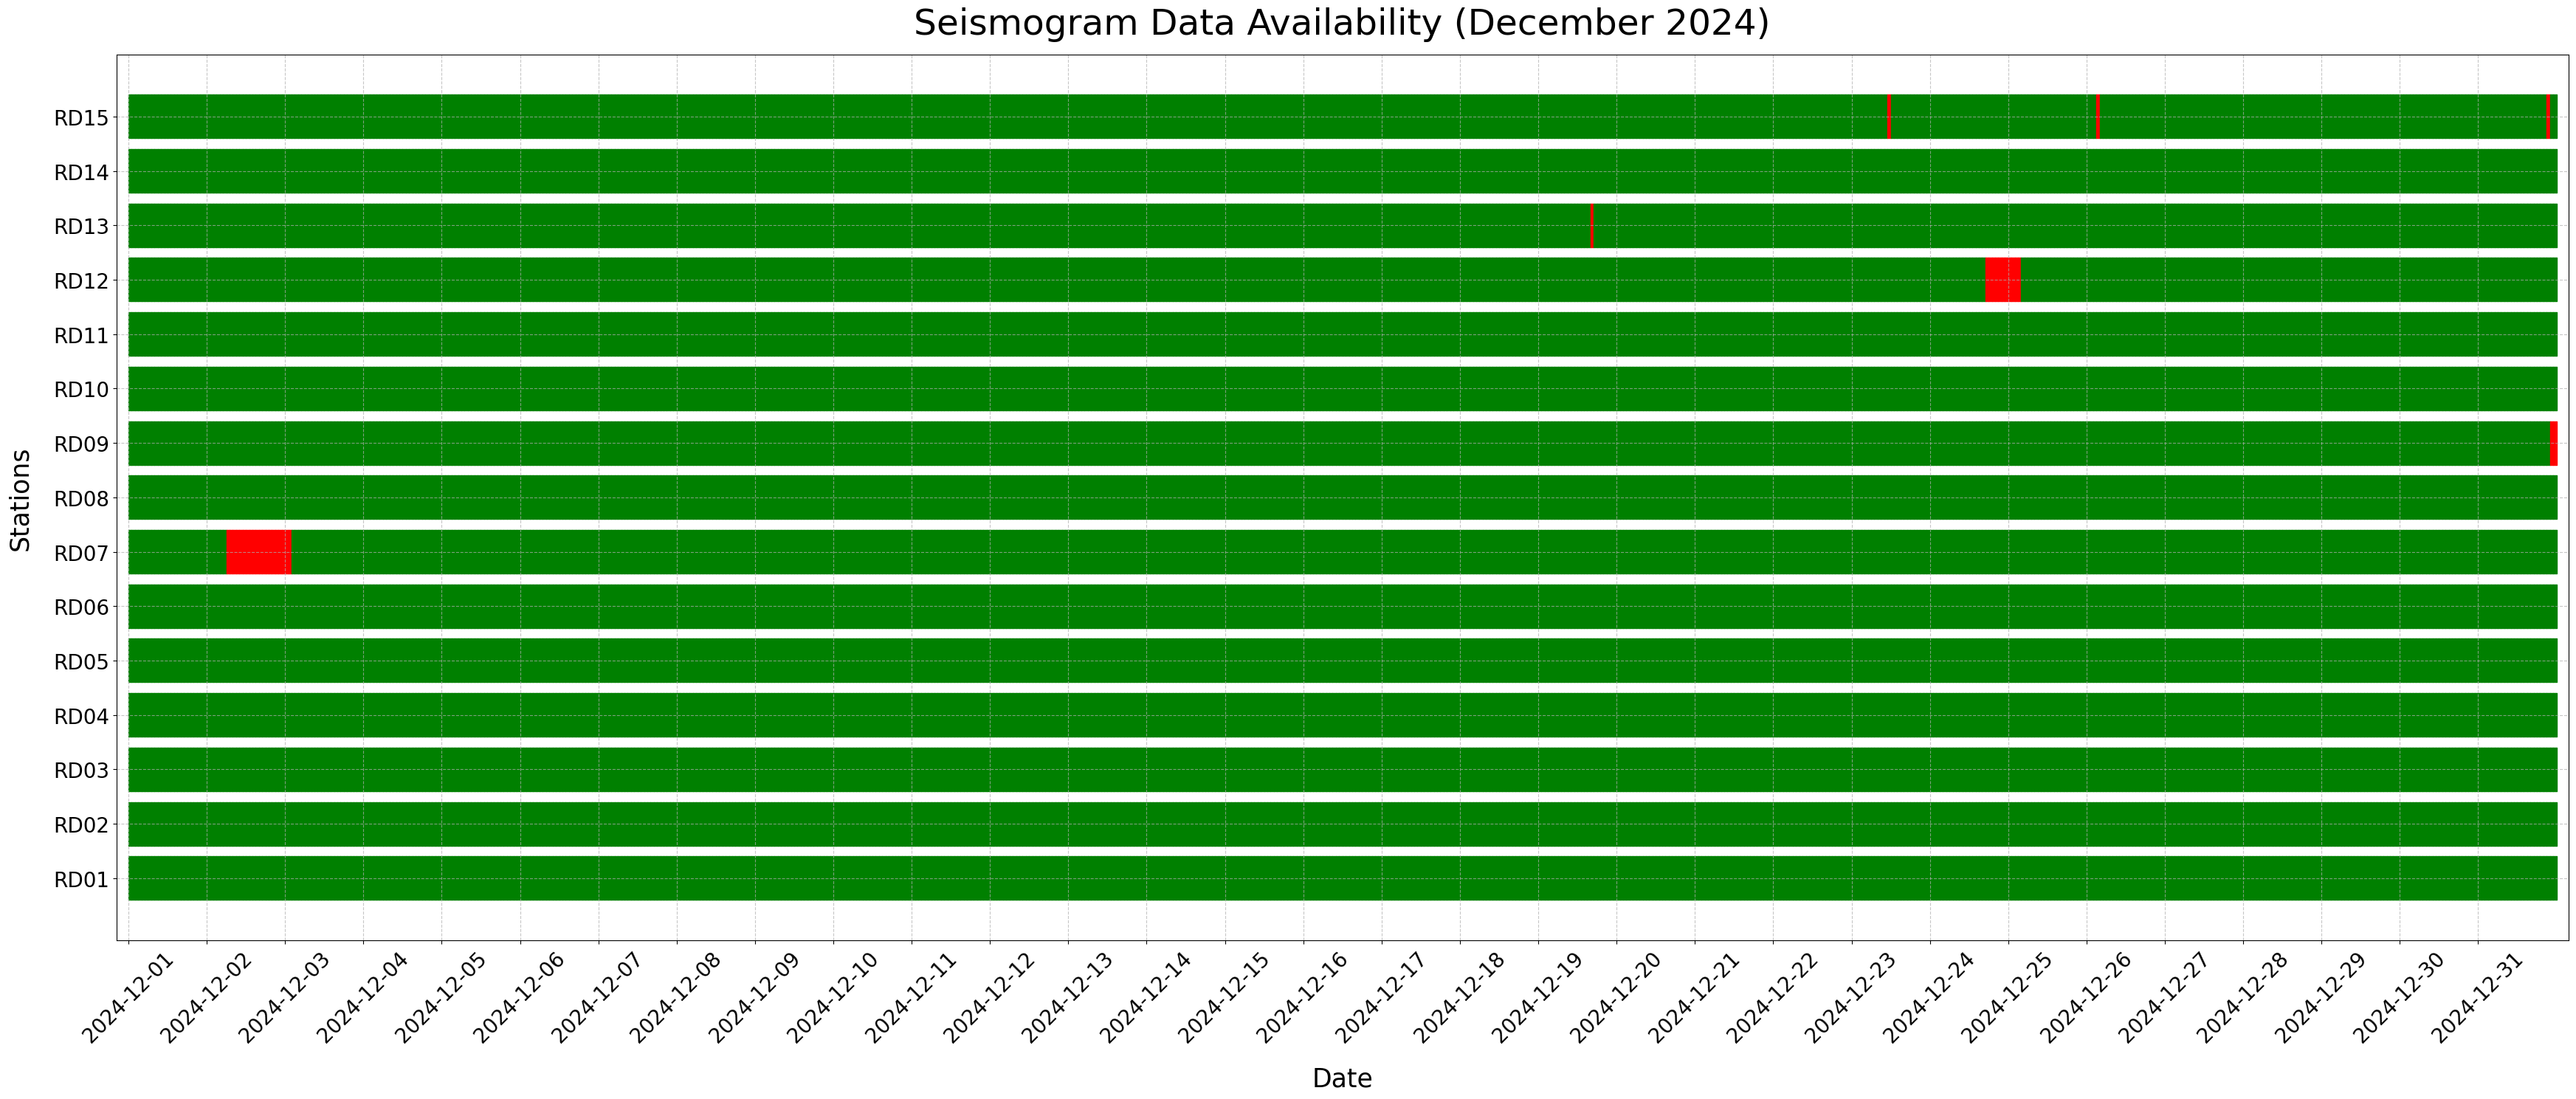

In [4]:
fig, ax = plt.subplots(figsize=(35, 15))
cmap = {True: 'green', False: 'red'}
station_offset = 0.4  # Adjust station offset for thickness

for day_idx, day_data in enumerate(data_availability):
    for station_idx, hourly_data in enumerate(day_data):
        for hour_idx, hour_status in enumerate(hourly_data):
            color = cmap[hour_status]
            ax.fill_betweenx(
                [station_idx - station_offset, station_idx + station_offset], 
                day_idx * 24 + hour_idx, day_idx * 24 + hour_idx + 1,
                color=color
            )

# Labeling and customizing the chart
x_ticks = range(0, len(data_availability) * 24, 24)  # One tick per day
x_labels = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(len(data_availability))]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, fontsize=20)

# Tambahkan margin 5% dari total panjang x
total_hours = len(data_availability) * 24
margin = total_hours * 0.005  # 5% dari total panjang x

ax.set_xlim(-margin, total_hours + margin) #ax.set_xlim(0, len(data_availability) * 24)

ax.set_yticks(range(len(stations)))
ax.set_yticklabels(stations, fontsize=20)
ax.set_xlabel("Date", fontsize=25, labelpad=20)
ax.set_ylabel("Stations", fontsize=25, labelpad=20)
ax.set_title("Seismogram Data Availability (December 2024)", fontsize=35, pad=20)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
#fig.savefig("D:\SERD\laporan\Jan 2025 29\datav_dec2024")
plt.show()

In [5]:
# Convert the log to a DataFrame for better organization
missing_data_df = pd.DataFrame(missing_data_log)

In [6]:
missing_data_df

,Date,Station,Hour,Status
0,2024-12-02,RD07,06,Missing
1,2024-12-02,RD07,07,Missing
2,2024-12-02,RD07,08,Missing
3,2024-12-02,RD07,09,Missing
4,2024-12-02,RD07,10,Missing
5,2024-12-02,RD07,11,Missing
6,2024-12-02,RD07,12,Missing
7,2024-12-02,RD07,13,Missing
8,2024-12-02,RD07,14,Missing
9,2024-12-02,RD07,15,Missing
